# **BÙI KHÁNH VĨNH - 2010091 - Transformations**

## **DATA AND LIBRARIES PREPARATION**

### **MOUNT DRIVE AND INSTALL PACKAGES**


In [1]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CV-assignment/Project4

/content/drive/MyDrive/CV-assignment/Project4


### **IMPORT LIBRARIES**

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from typing import List, Tuple

### **LOAD IMAGE**

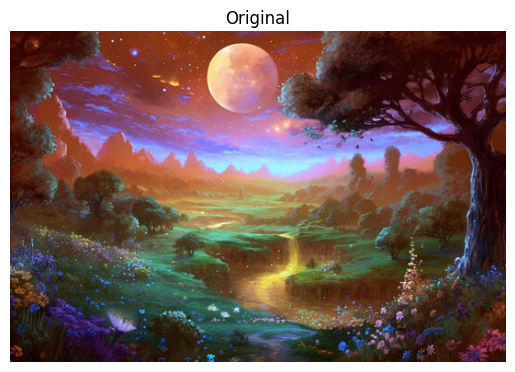

In [4]:
input_image = cv2.imread('image.png') #Load Image
image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)
plt.title('Original')
plt.axis('off')
plt.show()

## **IMPLEMENT PROJECT**

### 1) Several Image Transformations

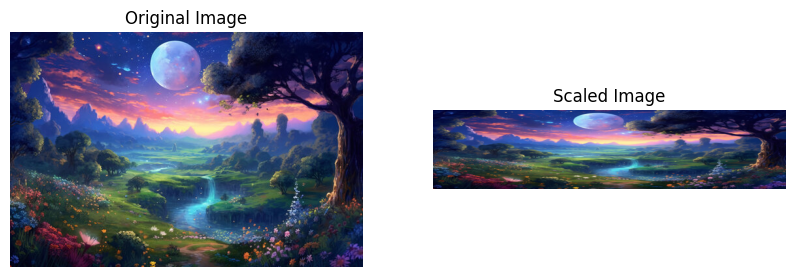

In [5]:
#scale transformation
scale_x = 1.5  # Scaling factor for width (1.5 times larger)
scale_y = 0.5  # Scaling factor for height (0.5 times smaller)
height, width = input_image.shape[:2]
scaled_image = cv2.resize(input_image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)
scaled_image_rgb = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(scaled_image_rgb)
plt.title('Scaled Image')
plt.axis('off')
plt.show()

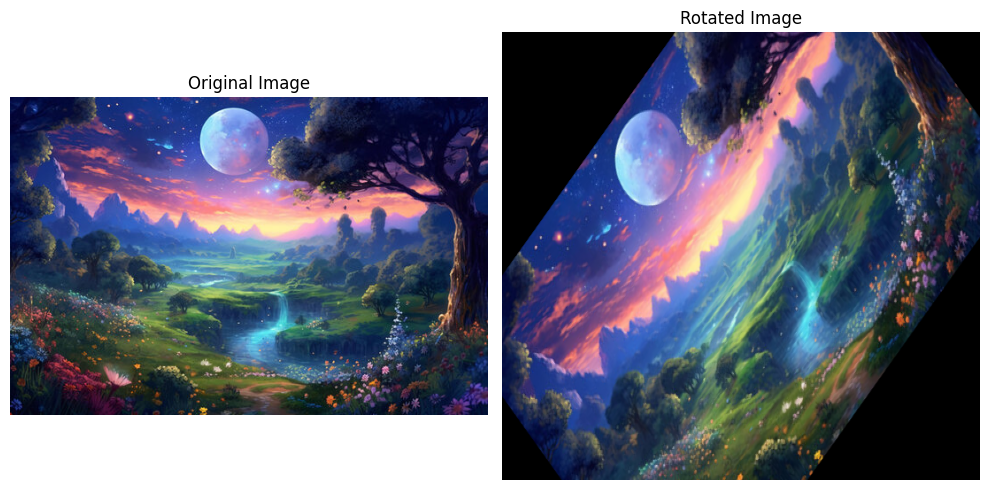

In [6]:
#rotate transformation
angle = 45
height, width = input_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
rotated_image = cv2.warpAffine(input_image, rotation_matrix, (width, height))
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rotated_image_rgb, aspect='auto')
plt.title('Rotated Image')
plt.axis('off')
plt.tight_layout()
plt.show()

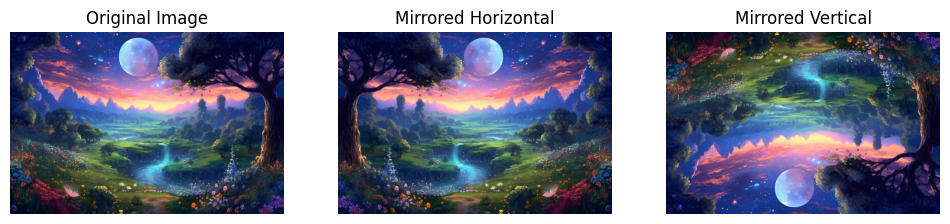

In [7]:
#mirror transformation
mirrored_horizontal = cv2.flip(input_image, 1)
mirrored_vertical = cv2.flip(input_image, 0)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
mirrored_horizontal_rgb = cv2.cvtColor(mirrored_horizontal, cv2.COLOR_BGR2RGB)
mirrored_vertical_rgb = cv2.cvtColor(mirrored_vertical, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(input_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(mirrored_horizontal_rgb)
plt.title('Mirrored Horizontal')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(mirrored_vertical_rgb)
plt.title('Mirrored Vertical')
plt.axis('off')
plt.show()

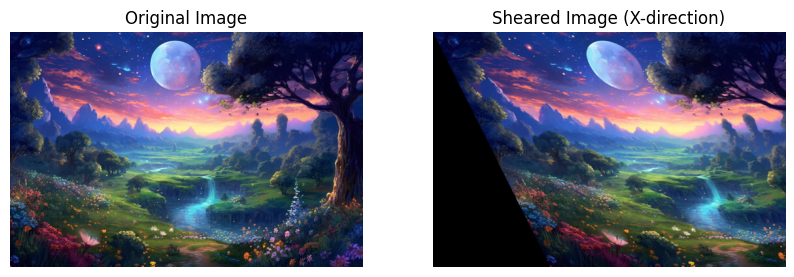

In [8]:
#shear transformation
shear_factor = 0.5
height, width = input_image.shape[:2]
shear_matrix = np.array([[1, shear_factor, 0], [0, 1, 0]], dtype=np.float32)
sheared_image = cv2.warpAffine(input_image, shear_matrix, (width, height))
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
sheared_image_rgb = cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sheared_image_rgb)
plt.title('Sheared Image (X-direction)')
plt.axis('off')
plt.show()

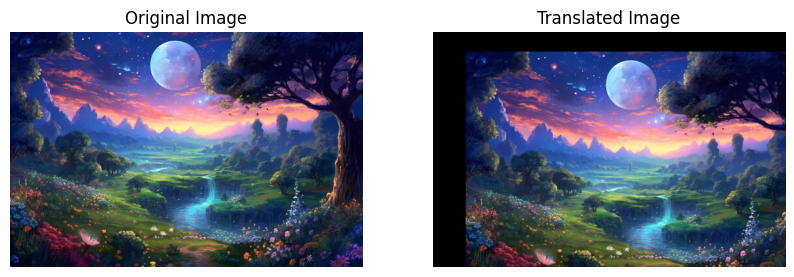

In [9]:
#translation transformation
shift_x = 50
shift_y = 30
height, width = input_image.shape[:2]
translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
translated_image = cv2.warpAffine(input_image, translation_matrix, (width, height))
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(translated_image_rgb)
plt.title('Translated Image')
plt.axis('off')
plt.show()

### 2) Compare Affine And Projective Transformation

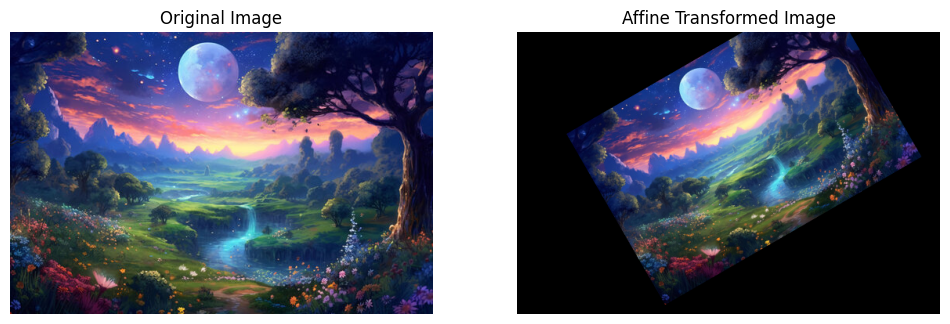

In [10]:
#affine transformation
height, width = input_image.shape[:2]

# Define the affine transformation parameters
scale_factor = 0.7  # Scaling factor
angle = 30  # Rotation angle in degrees
tx = 50  # Translation along the x-axis
ty = -30  # Translation along the y-axis
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, scale_factor)
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
affine_matrix = np.dot(rotation_matrix, np.vstack([translation_matrix, [0, 0, 1]]))
affine_image = cv2.warpAffine(input_image, affine_matrix[:2, :], (width, height))
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
affine_image_rgb = cv2.cvtColor(affine_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(affine_image_rgb)
plt.title('Affine Transformed Image')
plt.axis('off')

plt.show()

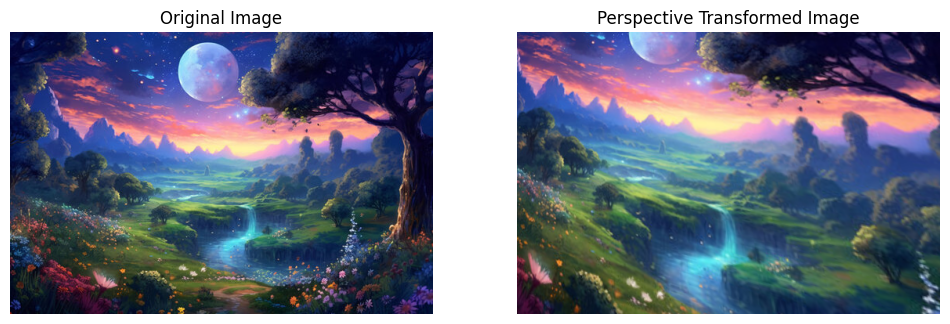

In [18]:
#Perspective Transformed Image
height, width = input_image.shape[:2]

# Define the source points (4 corners of a quadrilateral)
source_points = np.float32([[50, 50], [width-50, 50], [100, height], [width-100, height-100]])
destination_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
perspective_matrix = cv2.getPerspectiveTransform(source_points, destination_points)
perspective_image = cv2.warpPerspective(input_image, perspective_matrix, (width, height))
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
perspective_image_rgb = cv2.cvtColor(perspective_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(perspective_image_rgb)
plt.title('Perspective Transformed Image')
plt.axis('off')
plt.show()

### 3) Pasting a Rectangle

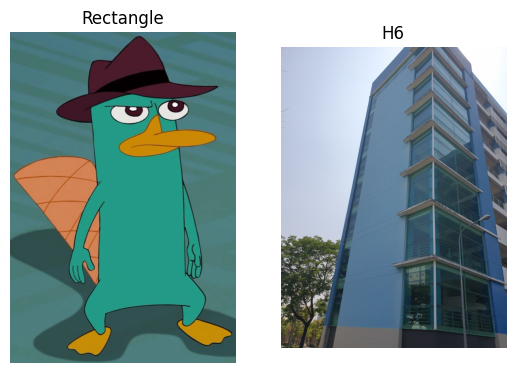

In [12]:
rectangle = cv2.imread("perry.png")
rec_rgb = cv2.cvtColor(rectangle, cv2.COLOR_BGR2RGB)
H6 = cv2.imread("H6.png")
H6_rgb = cv2.cvtColor(H6, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(rec_rgb)
plt.title('Rectangle')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(H6_rgb)
plt.title('H6')
plt.axis('off')
plt.show()

In [13]:
source_points = np.float32([
    [1200,700],
    [1750,200],
    [1600,3750],
    [600,3700],
])
rectangle_point = np.float32([
    [0,0],
    [rec_rgb.shape[1],0],
    [rec_rgb.shape[1],rec_rgb.shape[0]],
    [0,rec_rgb.shape[0]]
])

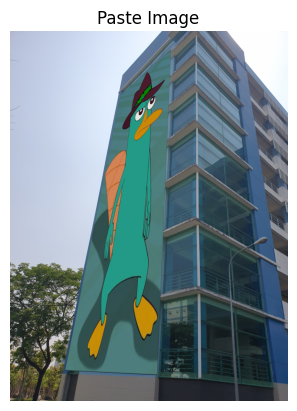

In [14]:
M = cv2.getPerspectiveTransform(rectangle_point,source_points)
paste = cv2.warpPerspective(rec_rgb,M,(H6_rgb.shape[1],H6_rgb.shape[0]),flags=cv2.INTER_LINEAR)
paste_img = cv2.copyTo(src=paste, mask=np.tile(paste, 1), dst=H6_rgb)
plt.imshow(paste_img)
plt.title("Paste Image")
plt.axis('off')
plt.show()